# Importando Bibliotecas

In [1]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("plyr")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [3]:
install.packages("reshape2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [4]:
library(ggplot2)
library(plyr)
library(reshape2)

In [5]:
options(repr.plot.width = 15, repr.plot.height = 10)

# Lendo dados

In [6]:
pokemon <- read.csv("Pokemon.csv", header = T, sep = ",")

In [7]:
head(pokemon)

,X.,Name,Type.1,Type.2,Total,HP,Attack,Defense,Sp..Atk,Sp..Def,Speed,Generation,Legendary
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<chr>
1,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
4,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
5,4,Charmander,Fire,,309,39,52,43,60,50,65,1,False
6,5,Charmeleon,Fire,,405,58,64,58,80,65,80,1,False


# Criando tabela de frequencia por tipo

In [8]:
table(pokemon$Type.1)


     Bug     Dark   Dragon Electric    Fairy Fighting     Fire   Flying 
      69       31       32       44       17       27       52        4 
   Ghost    Grass   Ground      Ice   Normal   Poison  Psychic     Rock 
      32       70       32       24       98       28       57       44 
   Steel    Water 
      27      112 

In [9]:
tabFreqTipo <- as.data.frame(table(pokemon$Type.1))

In [10]:
names(tabFreqTipo) <- c("Tipo", "Frequencia")

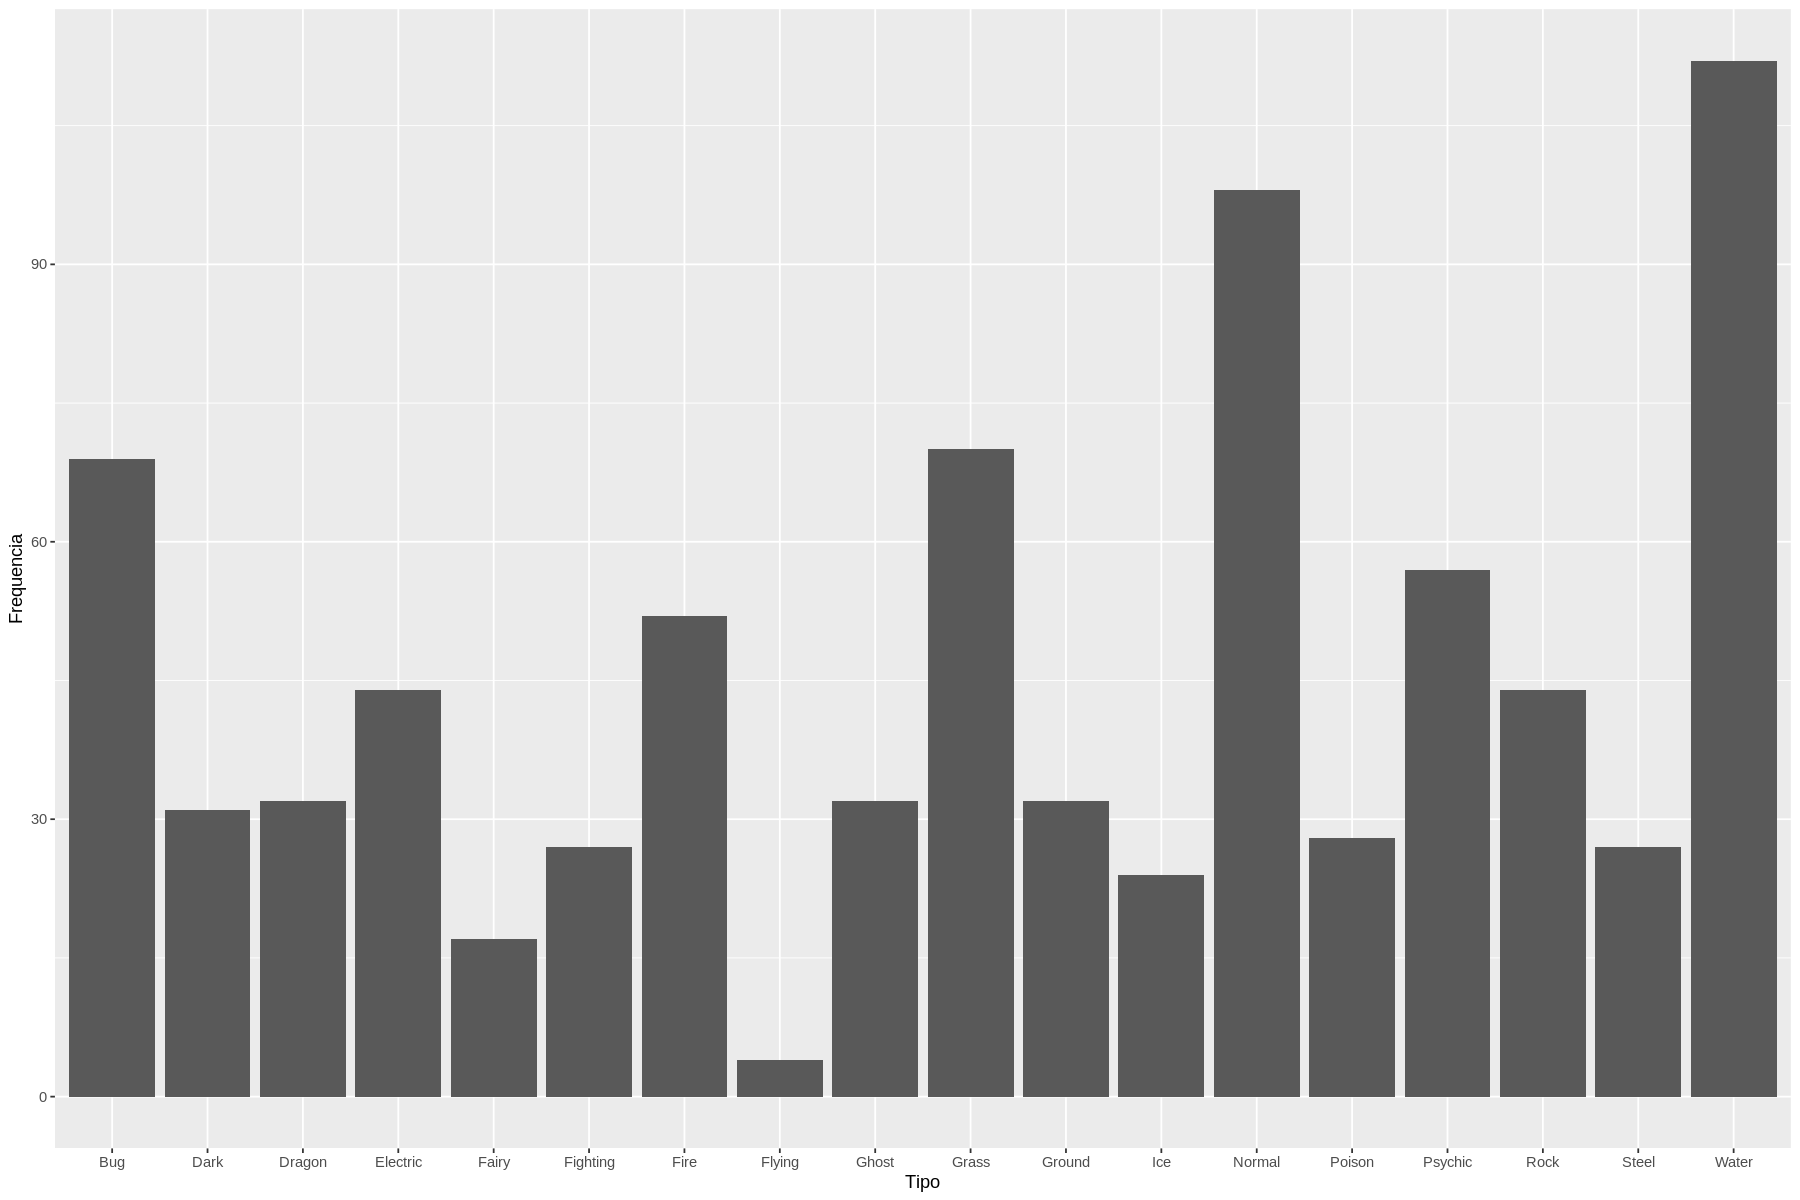

In [11]:
ggplot(data = tabFreqTipo, aes(x = Tipo, y = Frequencia)) + geom_bar(stat = "identity")

# Comparando ataque e defesa

## ataque e defesa

In [12]:
# media de ataque e defesa por tipo de pokemon
mediaAtaque <- ddply(pokemon, ~Type.1, summarise, mean = mean(Attack))
mediaDefesa <- ddply(pokemon, ~Type.1, summarise, mean = mean(Defense))

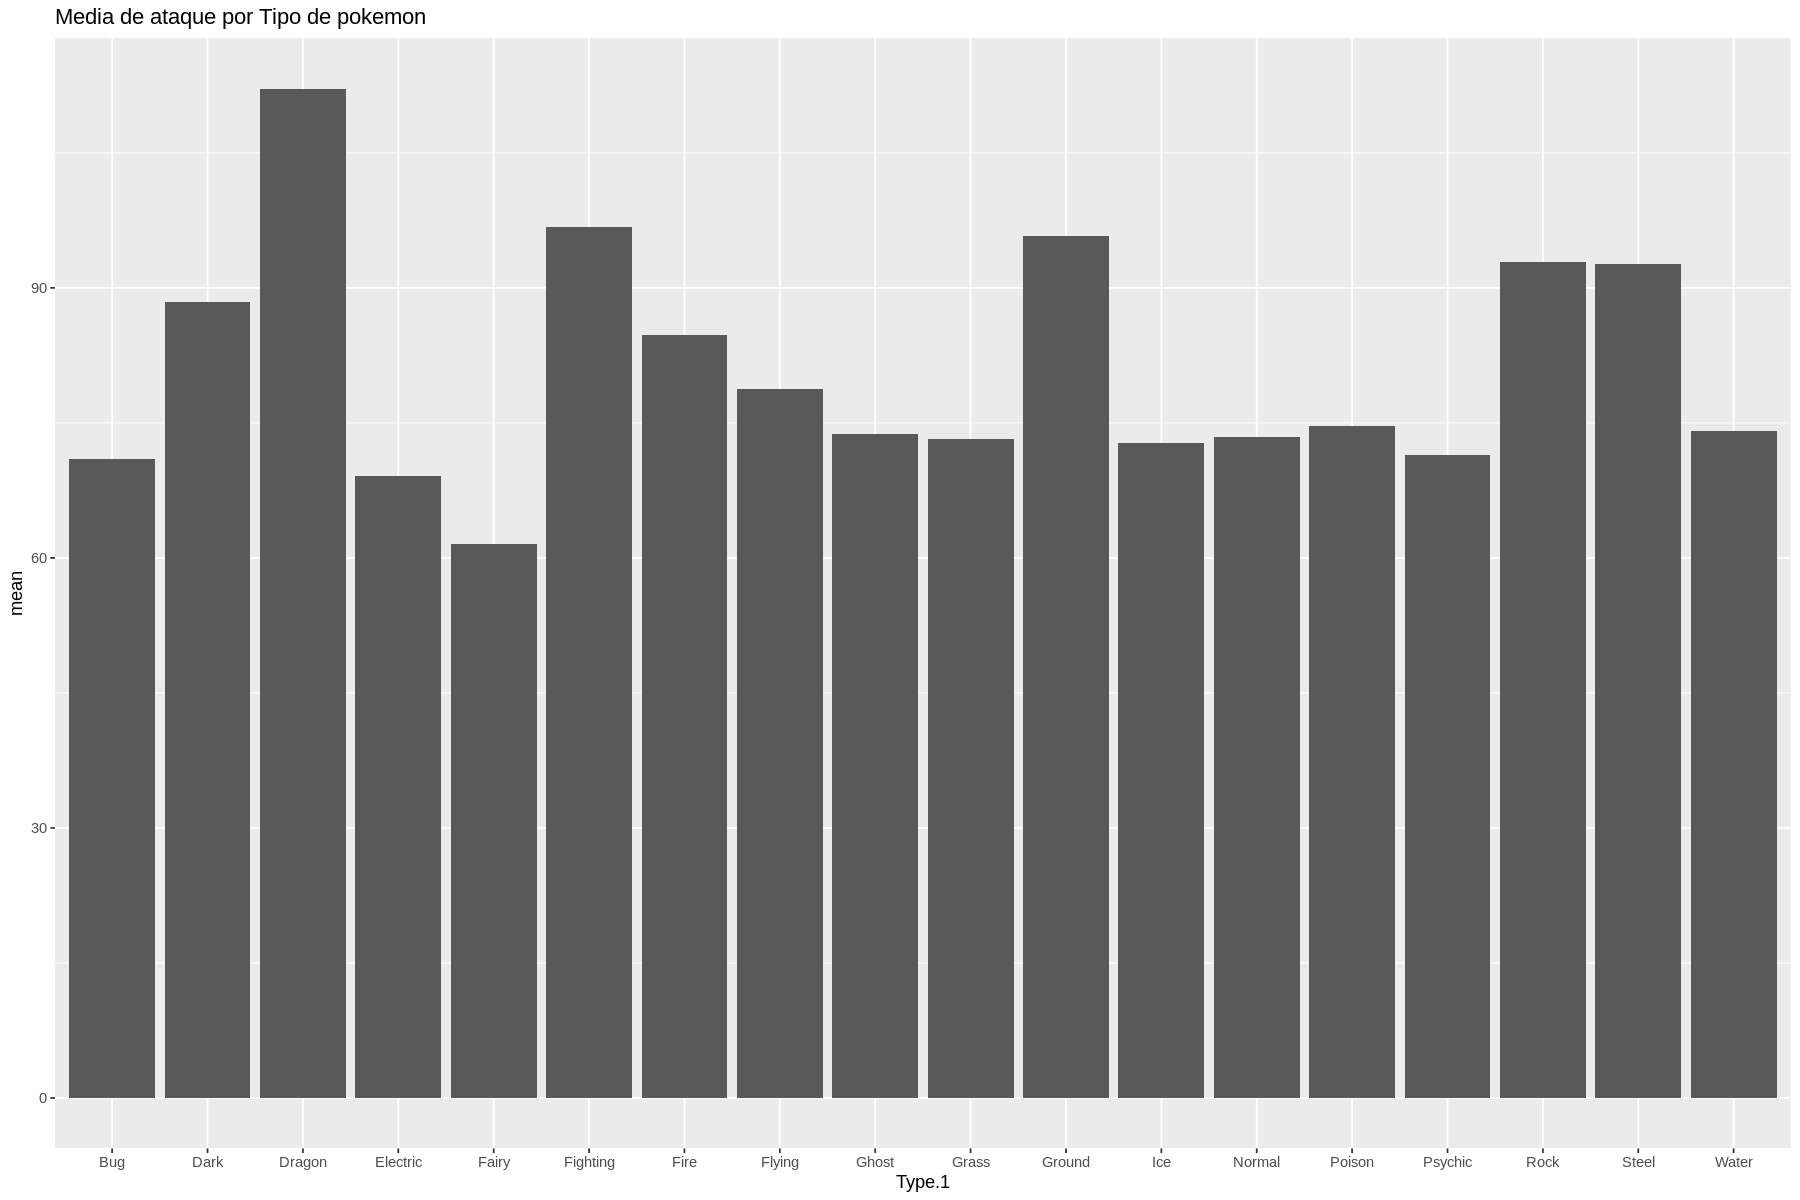

In [13]:
# grafico para média de ataque por tipo de pokemon
ggplot(data = mediaAtaque, aes(x = Type.1, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de ataque por Tipo de pokemon")

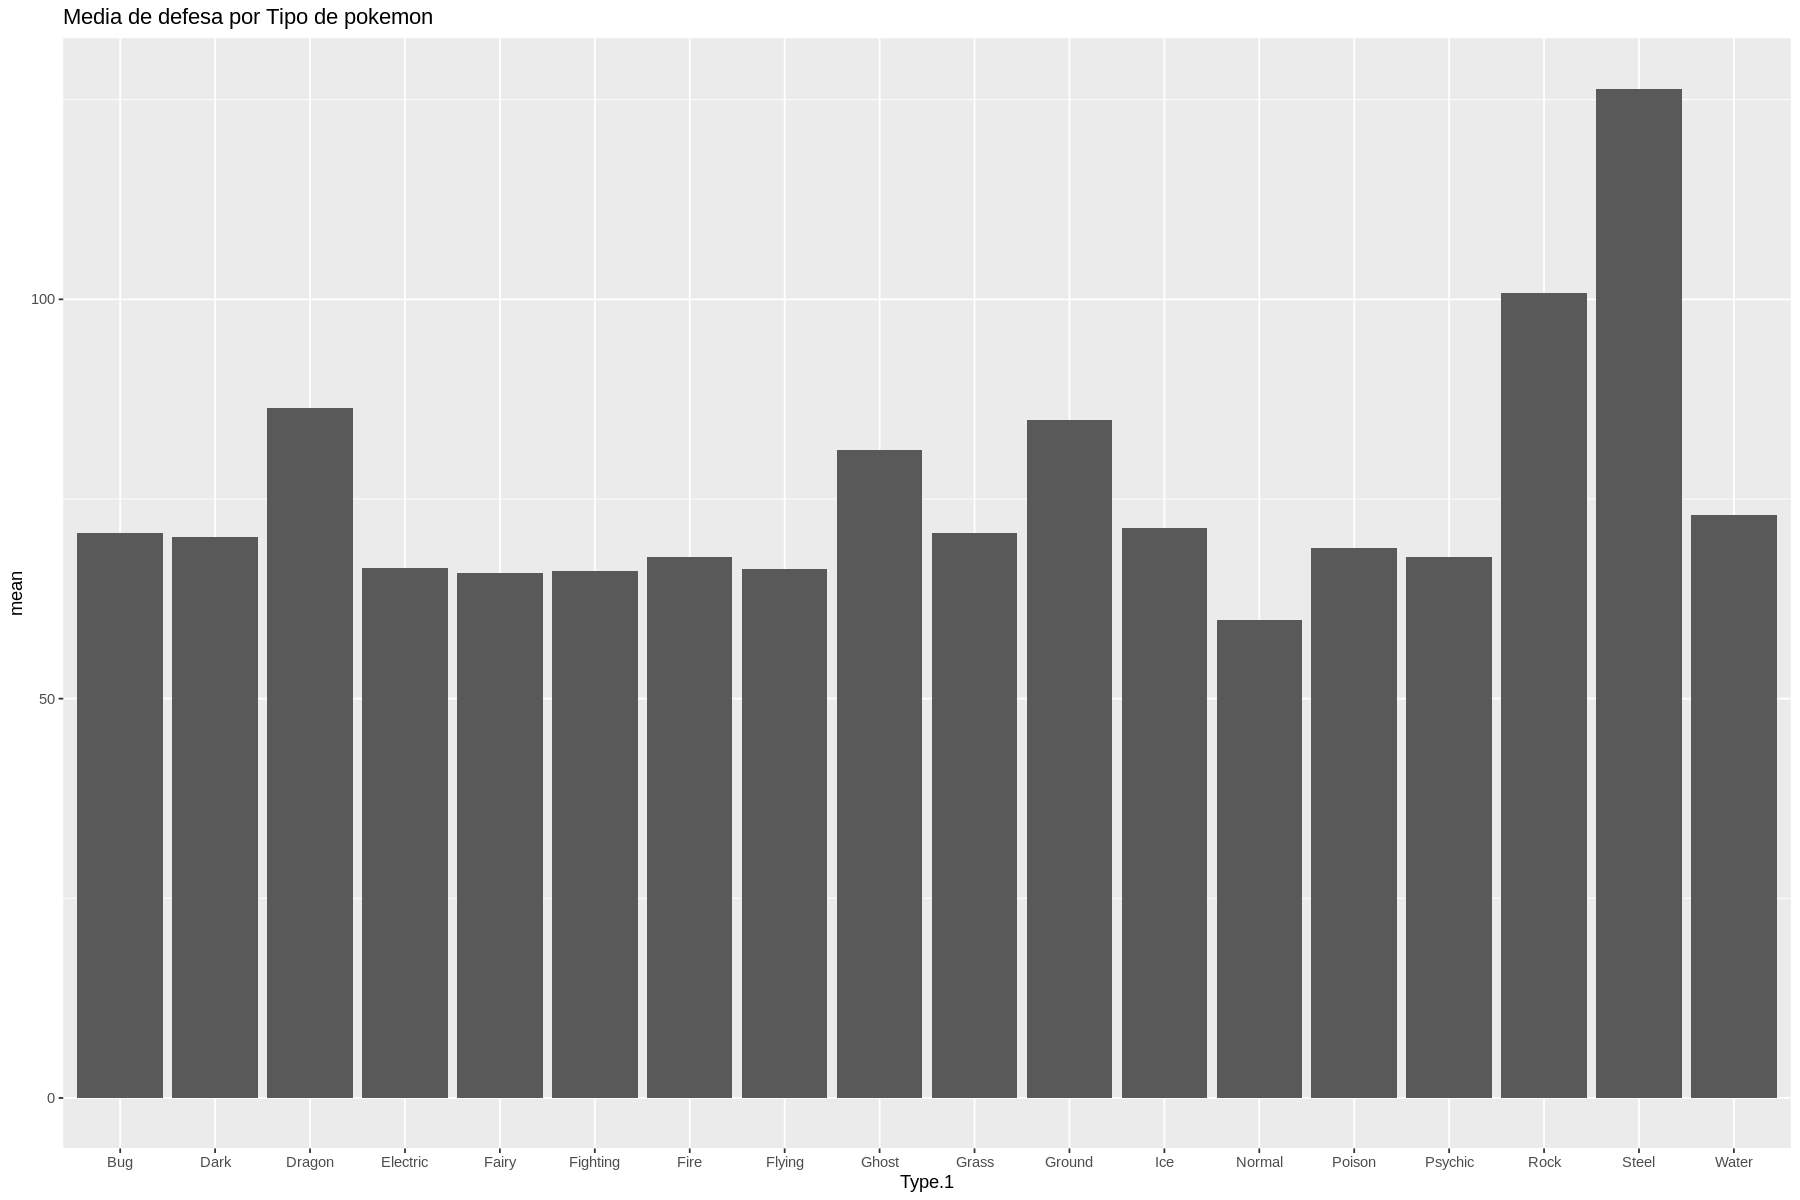

In [14]:
ggplot(data = mediaDefesa, aes(x = Type.1, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de defesa por Tipo de pokemon")

In [15]:
media <- cbind(mediaAtaque, mediaDefesa[,2])

names(media) <- c("tipo", "mediaAtaq","mediaDef")

mediaAtqDef <- melt(media, id = c("tipo"))

names(mediaAtqDef) <- c("tipo","ataq_def", "valor")

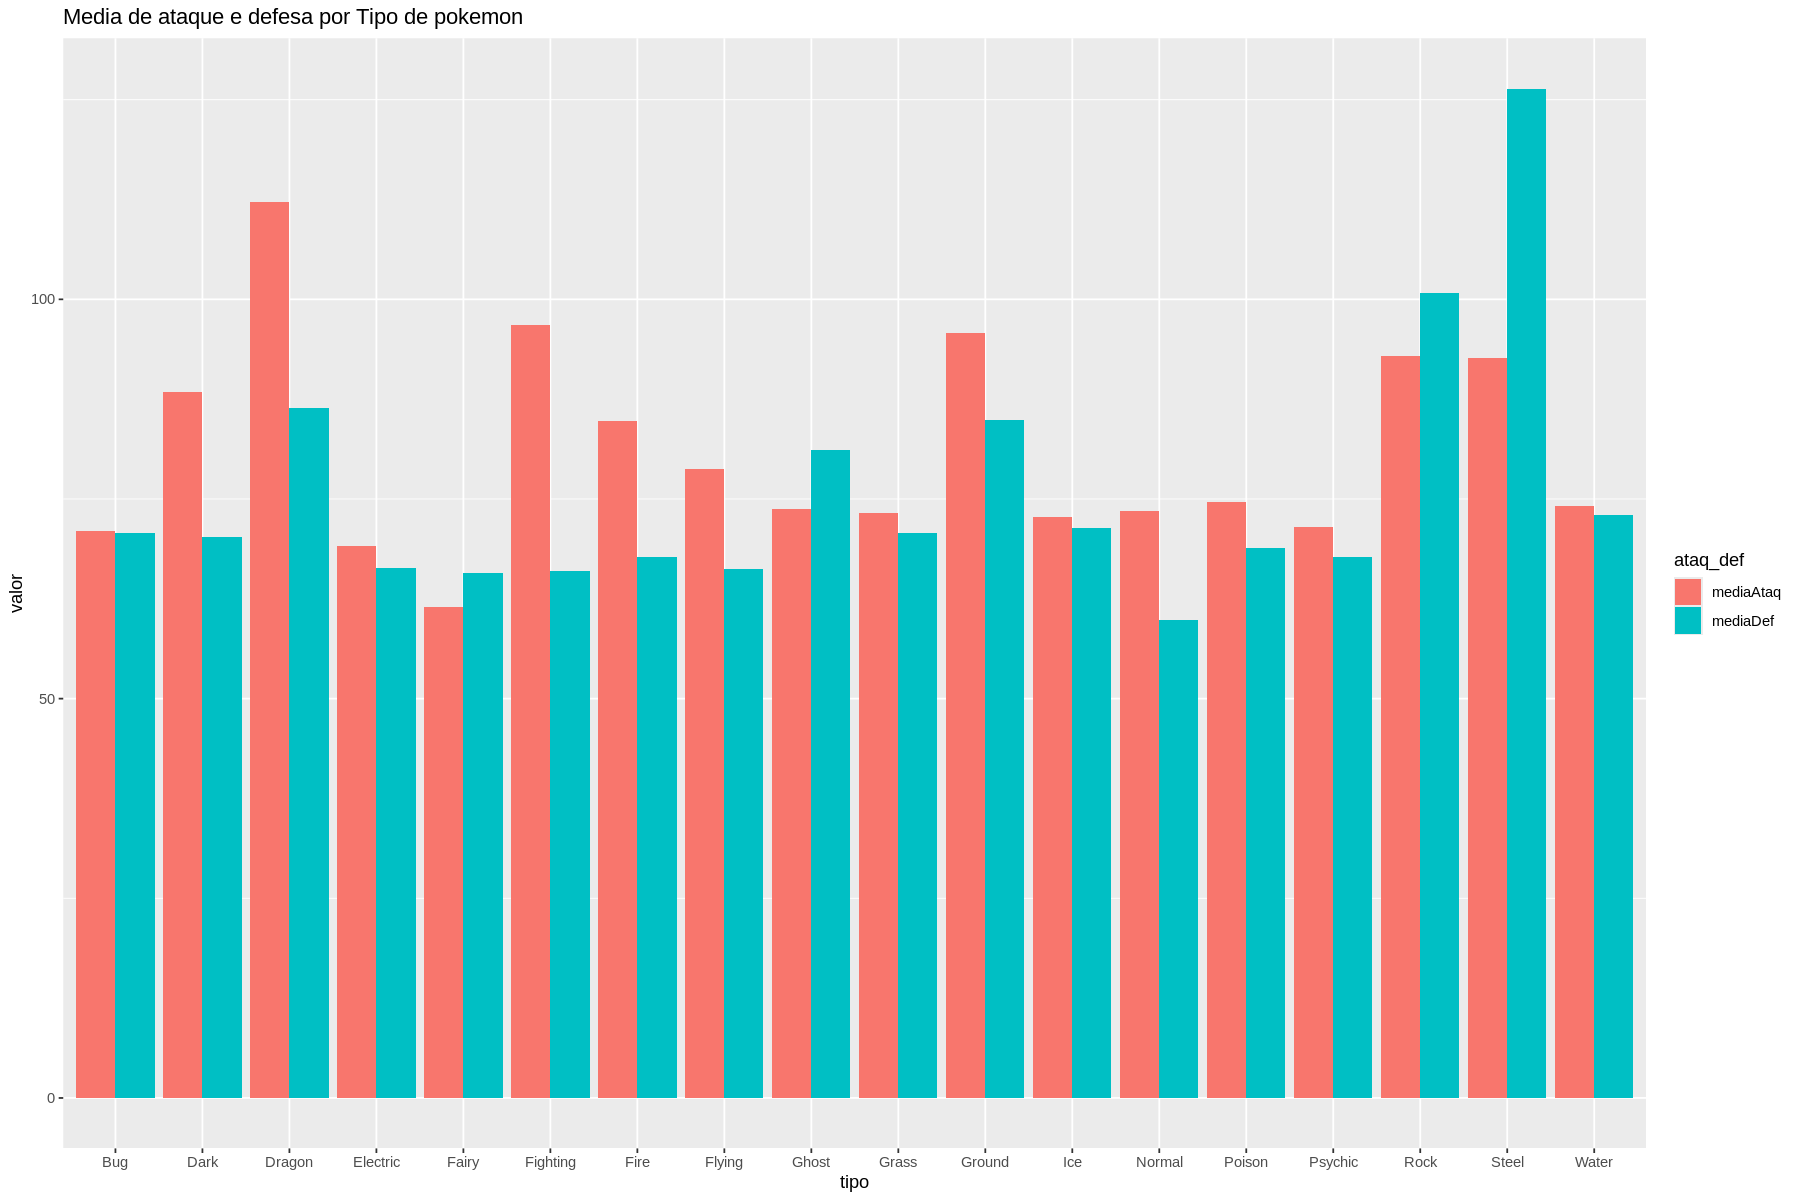

In [16]:
ggplot(data = mediaAtqDef, aes(x = tipo, y = valor,fill = ataq_def)) +
  geom_bar(stat = "identity",position=position_dodge()) +
  ggtitle("Media de ataque e defesa por Tipo de pokemon")

## ataque especial e defesa especial

In [17]:
mediaSpAtaque <- ddply(pokemon, ~Type.1, summarise, mean = mean(Sp..Atk))
mediaSpDefesa <- ddply(pokemon, ~Type.1, summarise, mean = mean(Sp..Def))

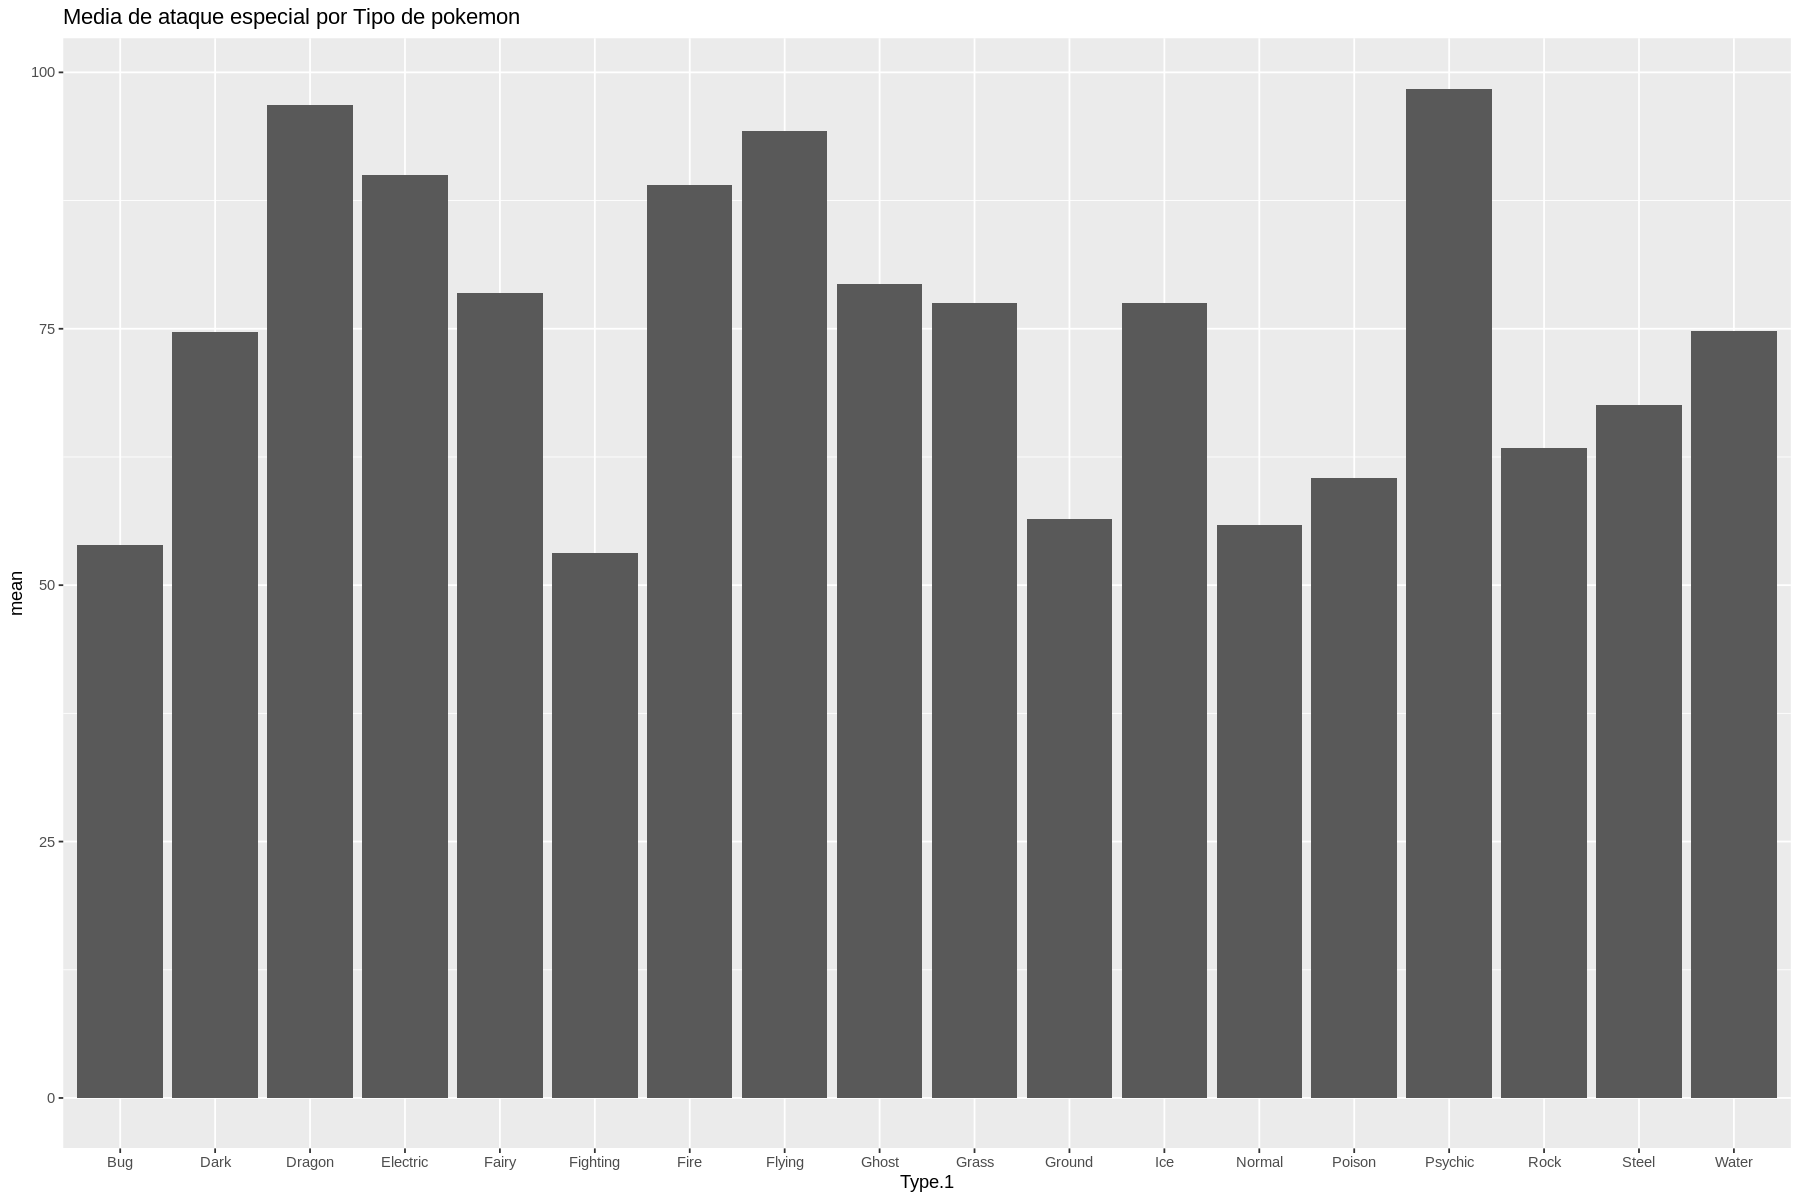

In [18]:
ggplot(data = mediaSpAtaque, aes(x = Type.1, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de ataque especial por Tipo de pokemon")

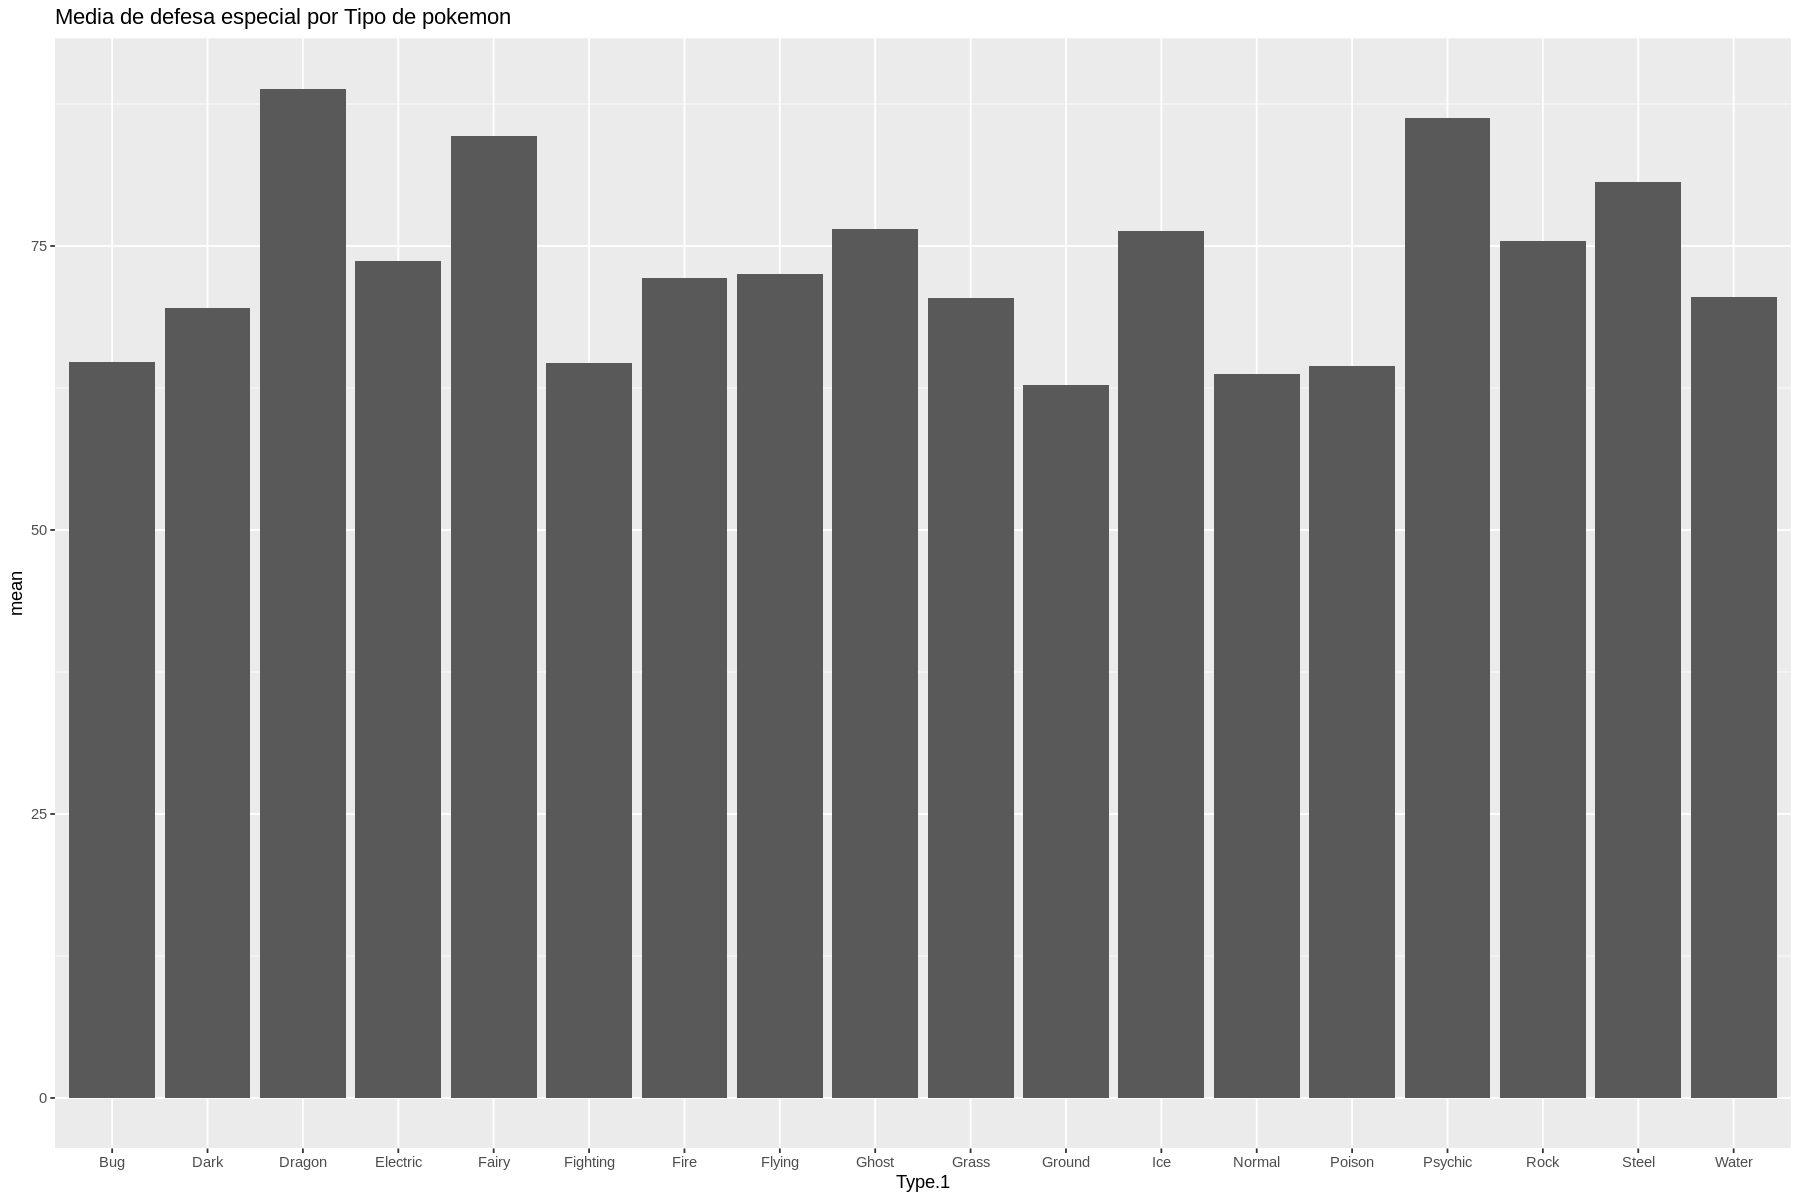

In [19]:
ggplot(data = mediaSpDefesa, aes(x = Type.1, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de defesa especial por Tipo de pokemon")

In [20]:
media <- cbind(mediaSpAtaque, mediaSpDefesa[,2])

names(media) <- c("tipo", "mediaSpAtaq","mediaSpDef")

mediaAtqDef <- melt(media, id = c("tipo"))

names(mediaAtqDef) <- c("tipo","Sp_ataq_def", "valor")

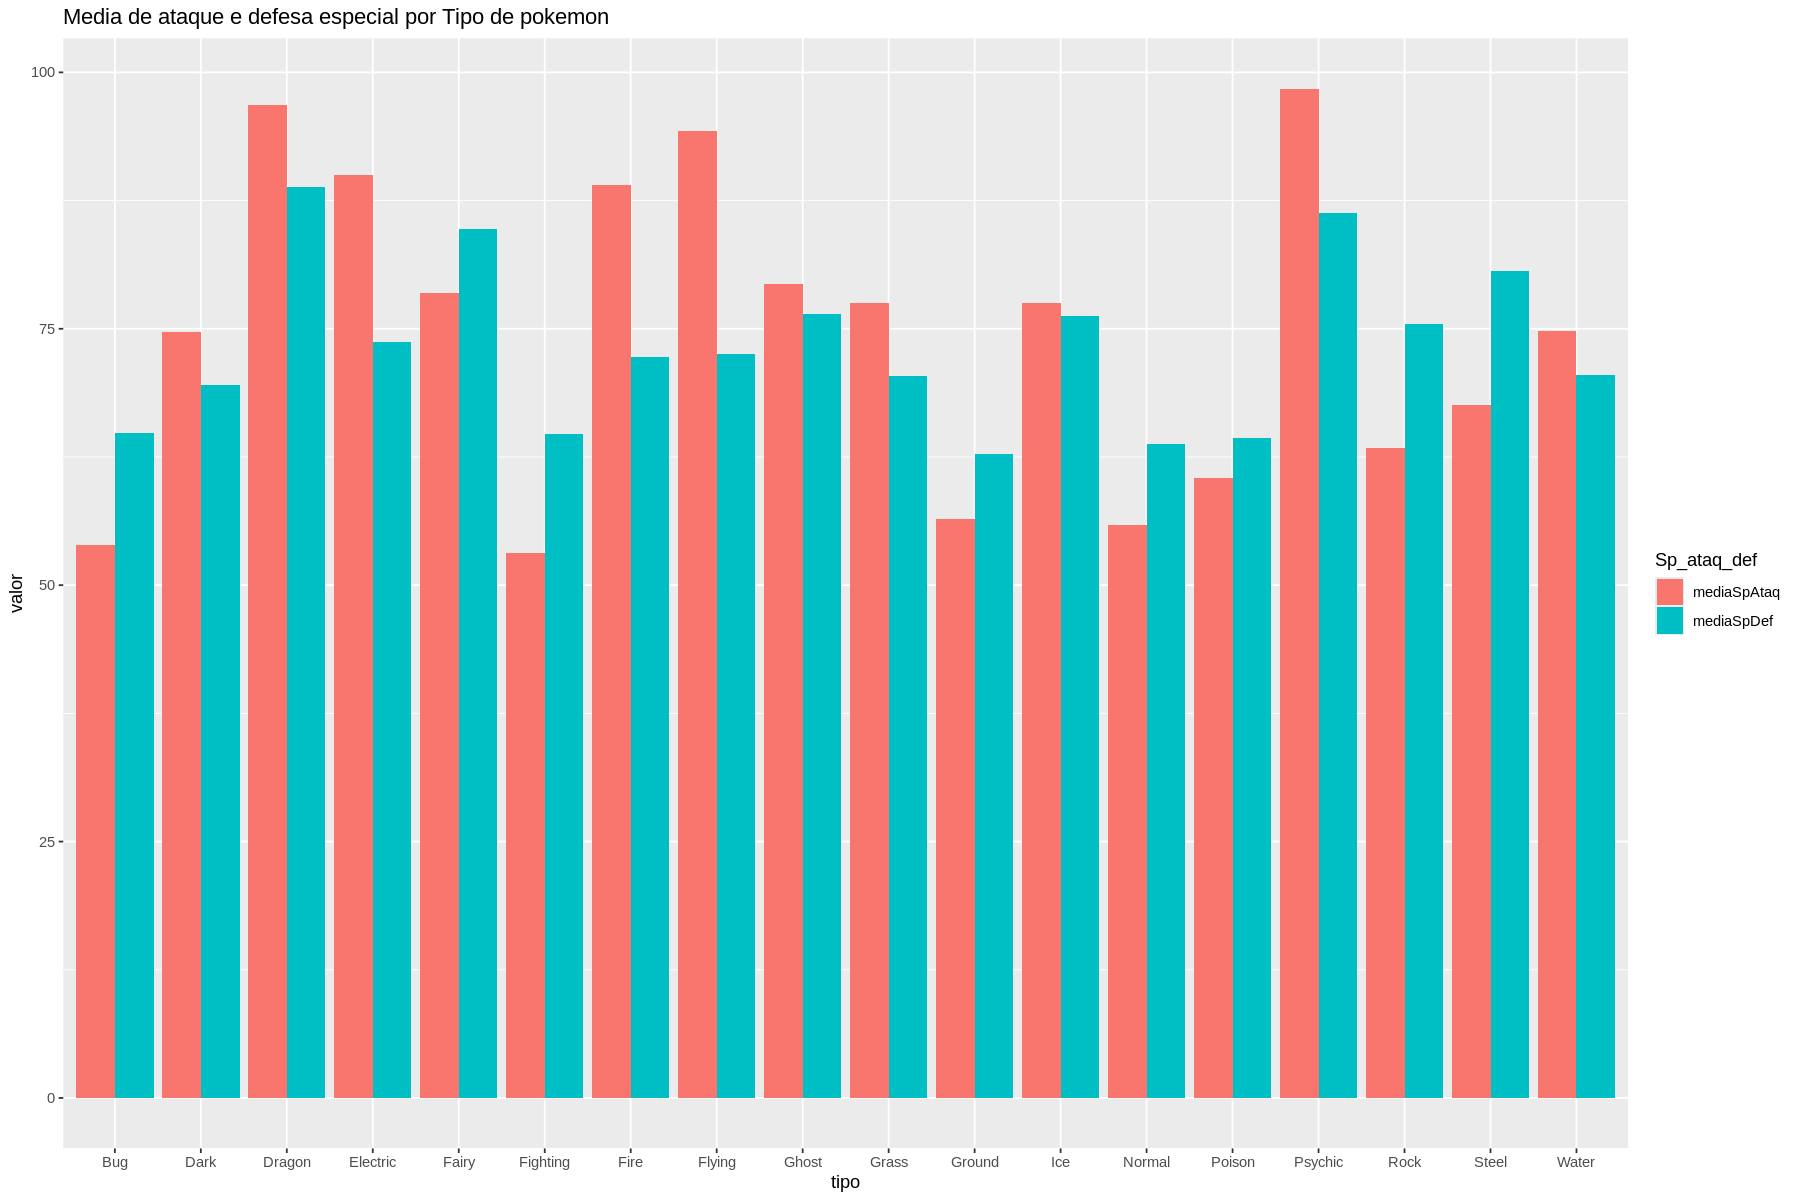

In [21]:
ggplot(data = mediaAtqDef, aes(x = tipo, y = valor,fill = Sp_ataq_def)) +
  geom_bar(stat = "identity",position=position_dodge()) +
  ggtitle("Media de ataque e defesa especial por Tipo de pokemon")

# Criando tabela de frequencia por geração

In [22]:
table(pokemon$Generation)


  1   2   3   4   5   6 
166 106 160 121 165  82 

In [23]:
tabFreqGen <- as.data.frame(table(pokemon$Generation))

In [24]:
names(tabFreqGen) <- c("Tipo", "Frequencia")

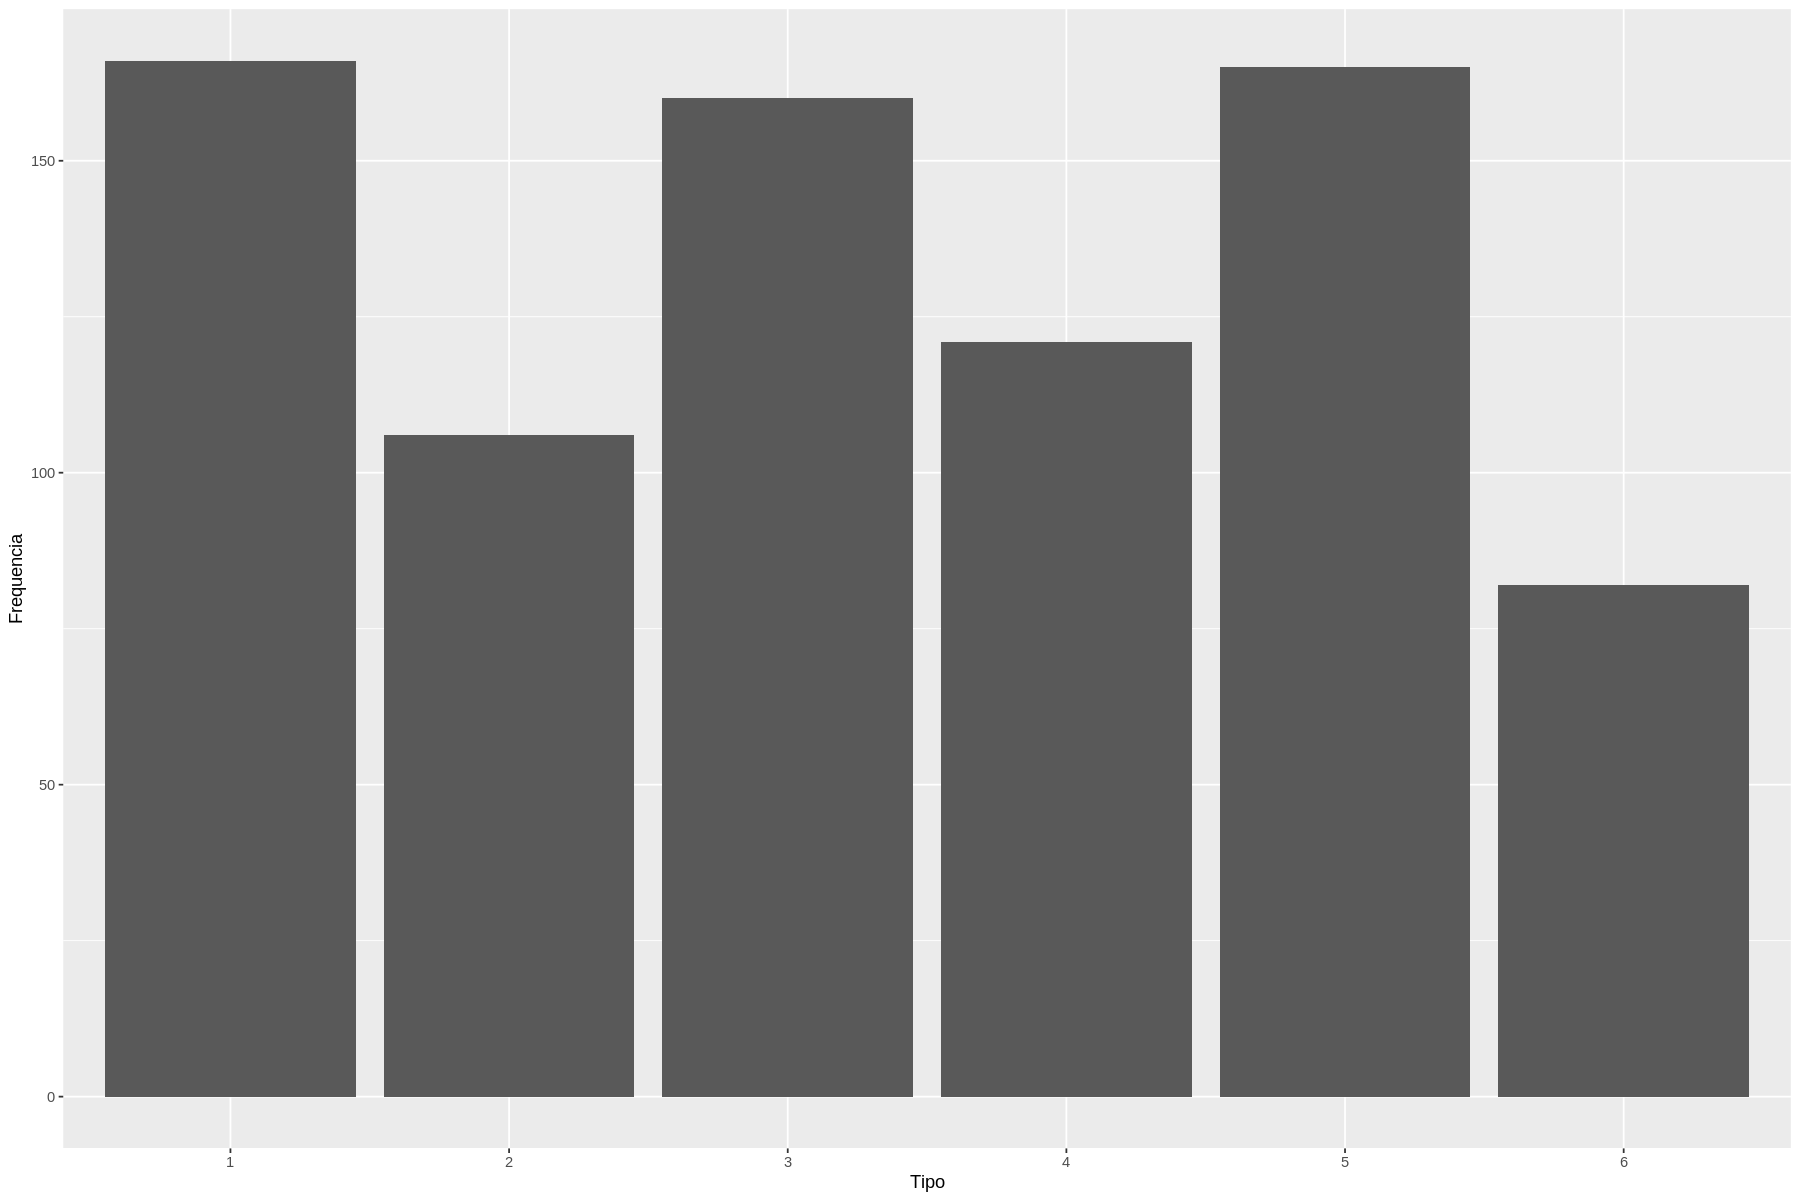

In [25]:
ggplot(data = tabFreqGen, aes(x = Tipo, y = Frequencia)) + geom_bar(stat = "identity")

# Comparando ataque e defesa

## ataque e defesa

In [26]:
mediaAtaque <- ddply(pokemon, ~Generation, summarise, mean = mean(Attack))
mediaDefesa <- ddply(pokemon, ~Generation, summarise, mean = mean(Defense))

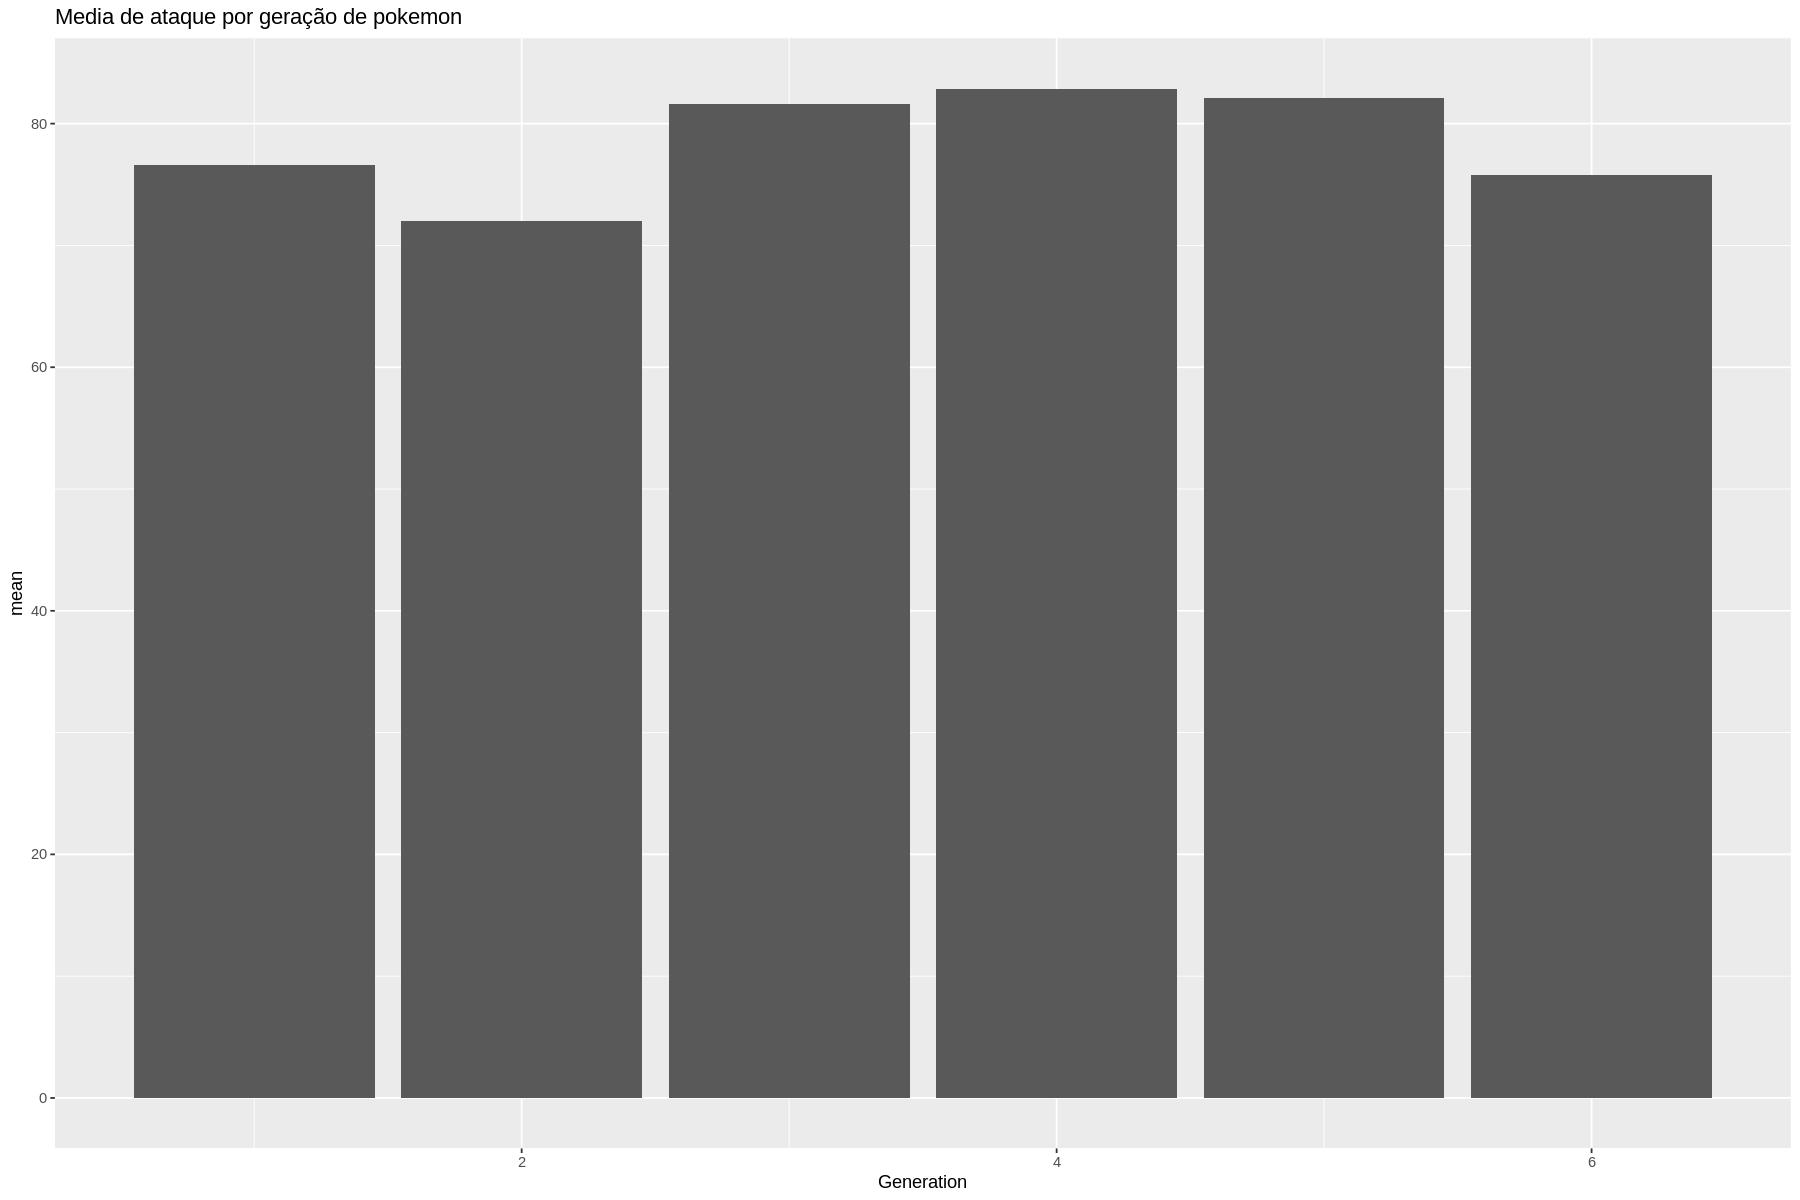

In [27]:
ggplot(data = mediaAtaque, aes(x = Generation, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de ataque por geração de pokemon")

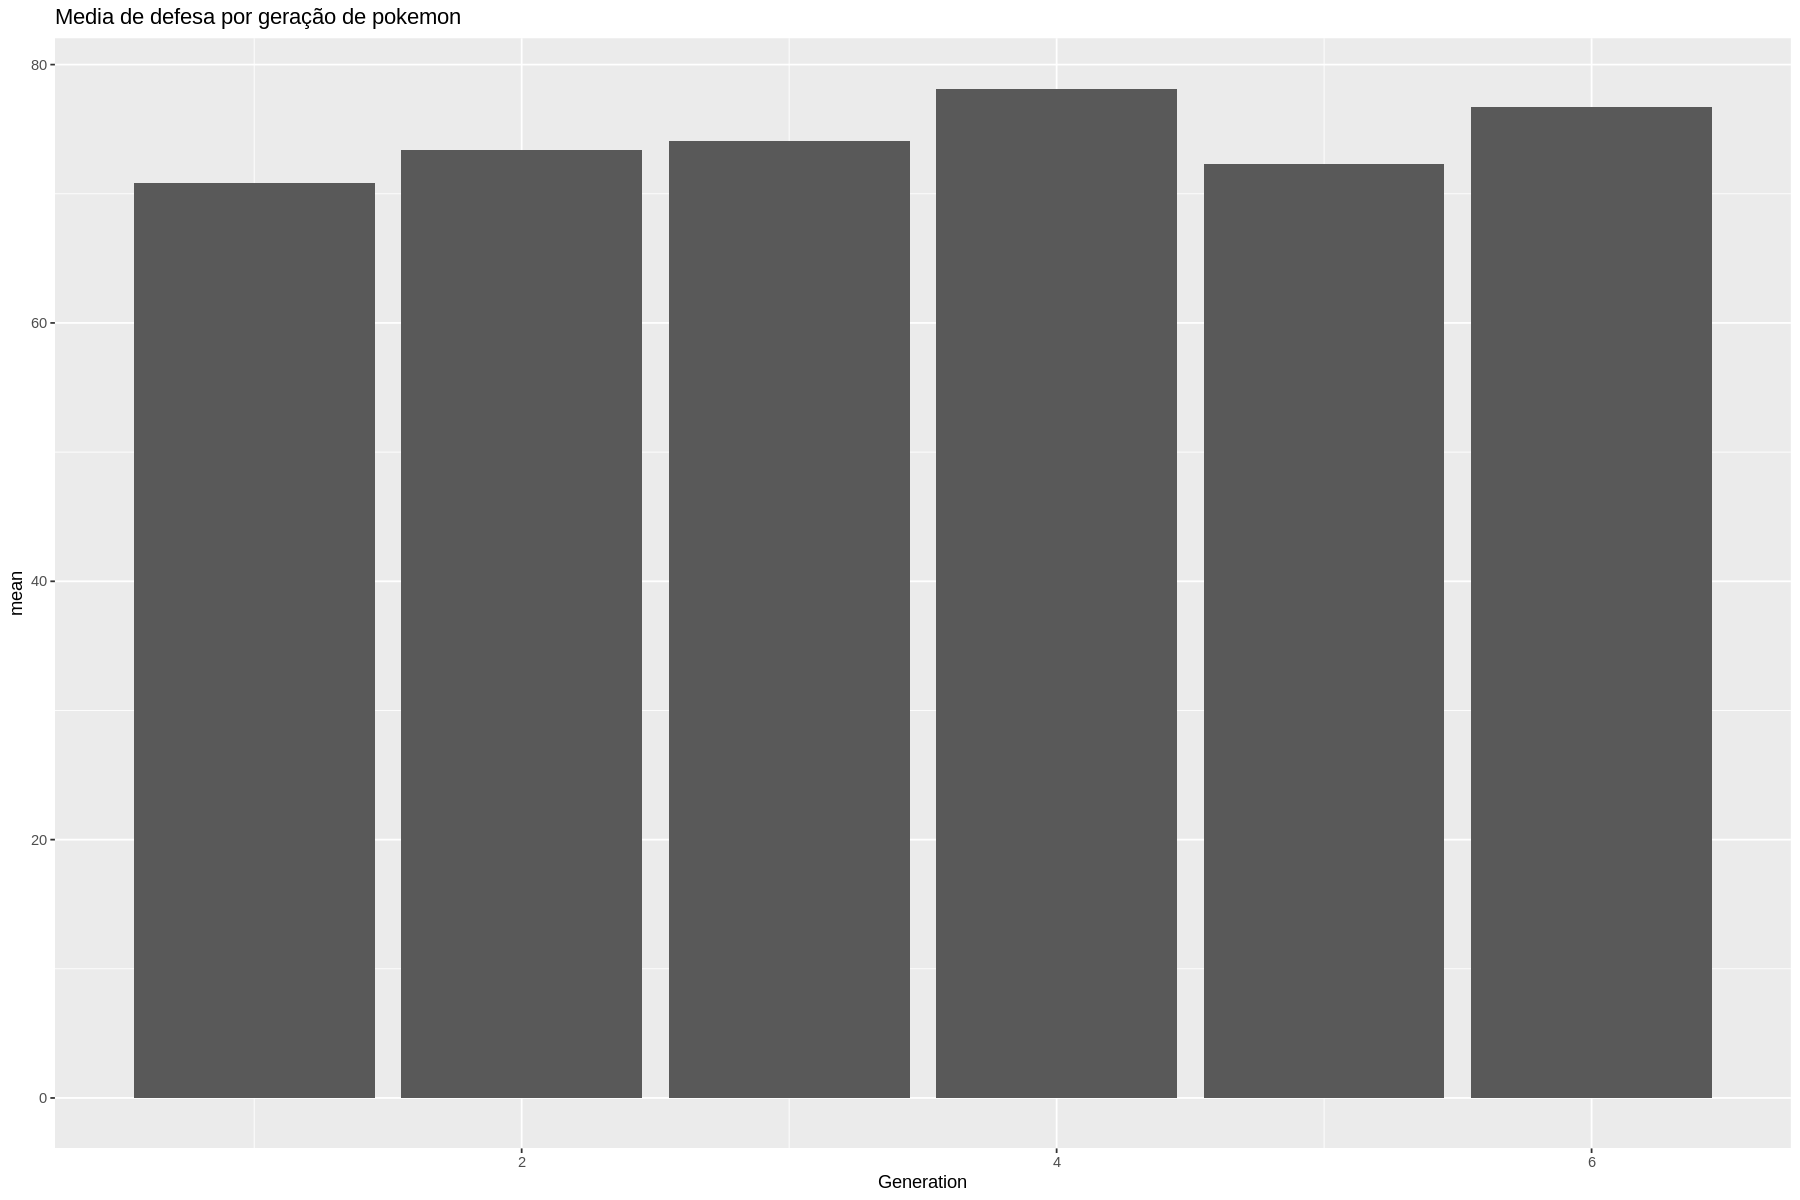

In [28]:
ggplot(data = mediaDefesa, aes(x = Generation, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de defesa por geração de pokemon")

In [29]:
media <- cbind(mediaAtaque, mediaDefesa[,2])

names(media) <- c("geracao", "mediaAtaq","mediaDef")

mediaAtqDef <- melt(media, id = c("geracao"))

names(mediaAtqDef) <- c("geracao","ataq_def", "valor")

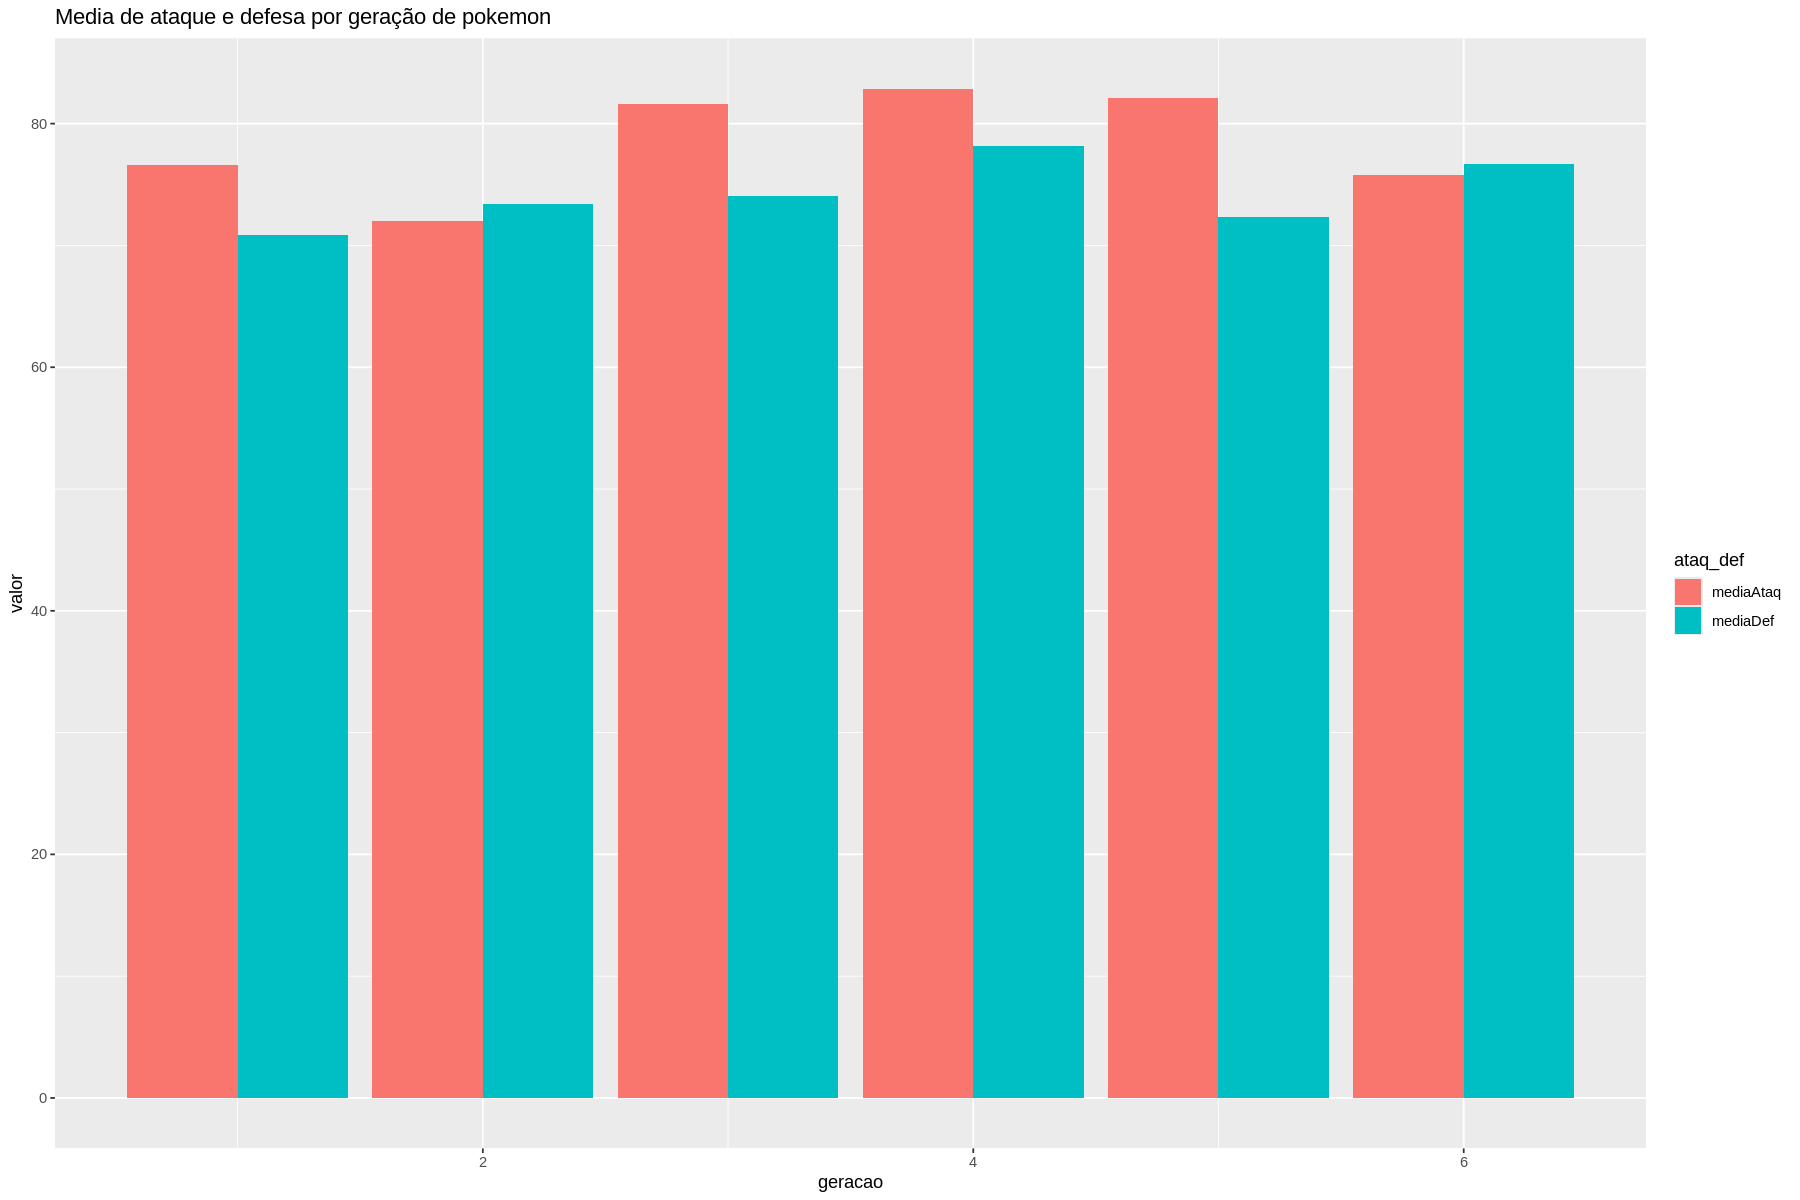

In [30]:
ggplot(data = mediaAtqDef, aes(x = geracao, y = valor,fill = ataq_def)) +
  geom_bar(stat = "identity",position=position_dodge()) +
  ggtitle("Media de ataque e defesa por geração de pokemon")

## ataque especial e defesa especial

In [31]:
mediaSpAtaque <- ddply(pokemon, ~Generation, summarise, mean = mean(Sp..Atk))
mediaSpDefesa <- ddply(pokemon, ~Generation, summarise, mean = mean(Sp..Def))

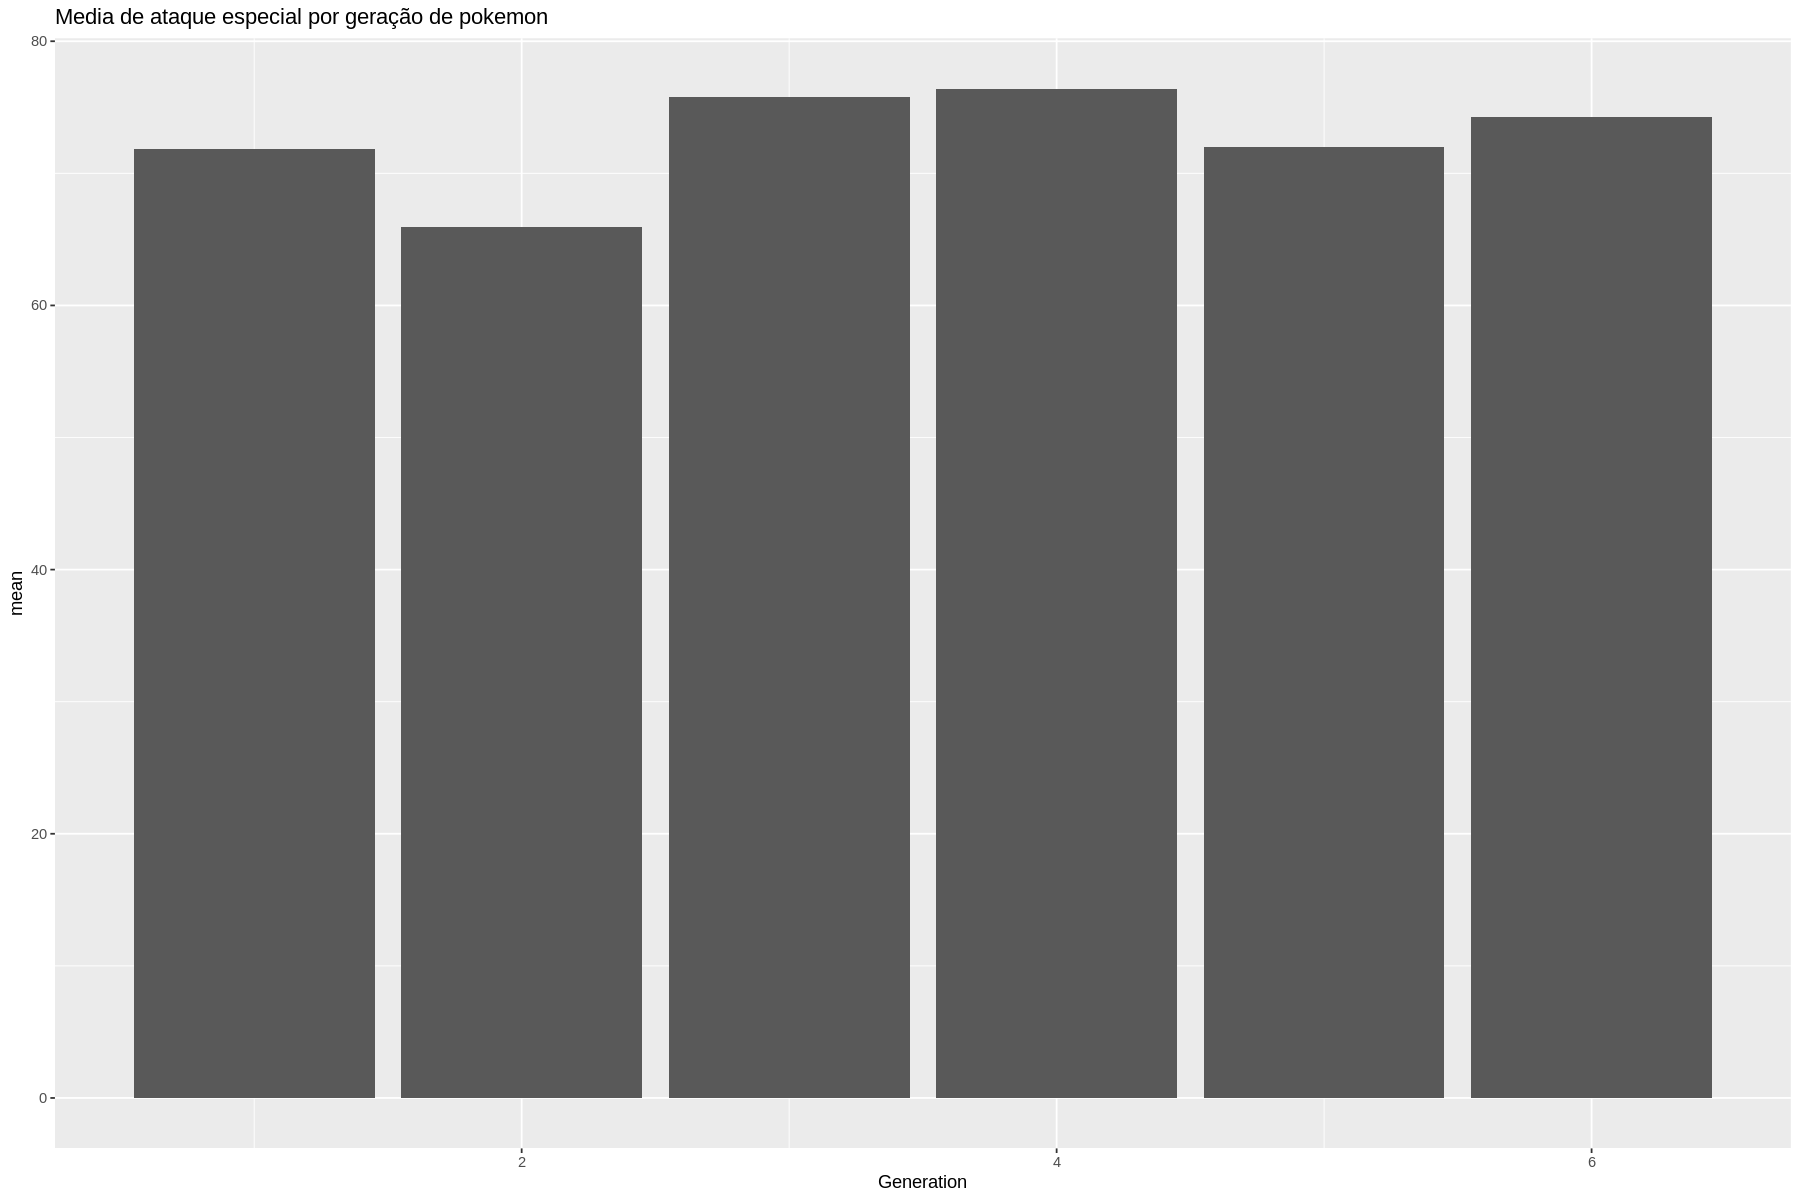

In [32]:
ggplot(data = mediaSpAtaque, aes(x = Generation, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de ataque especial por geração de pokemon")

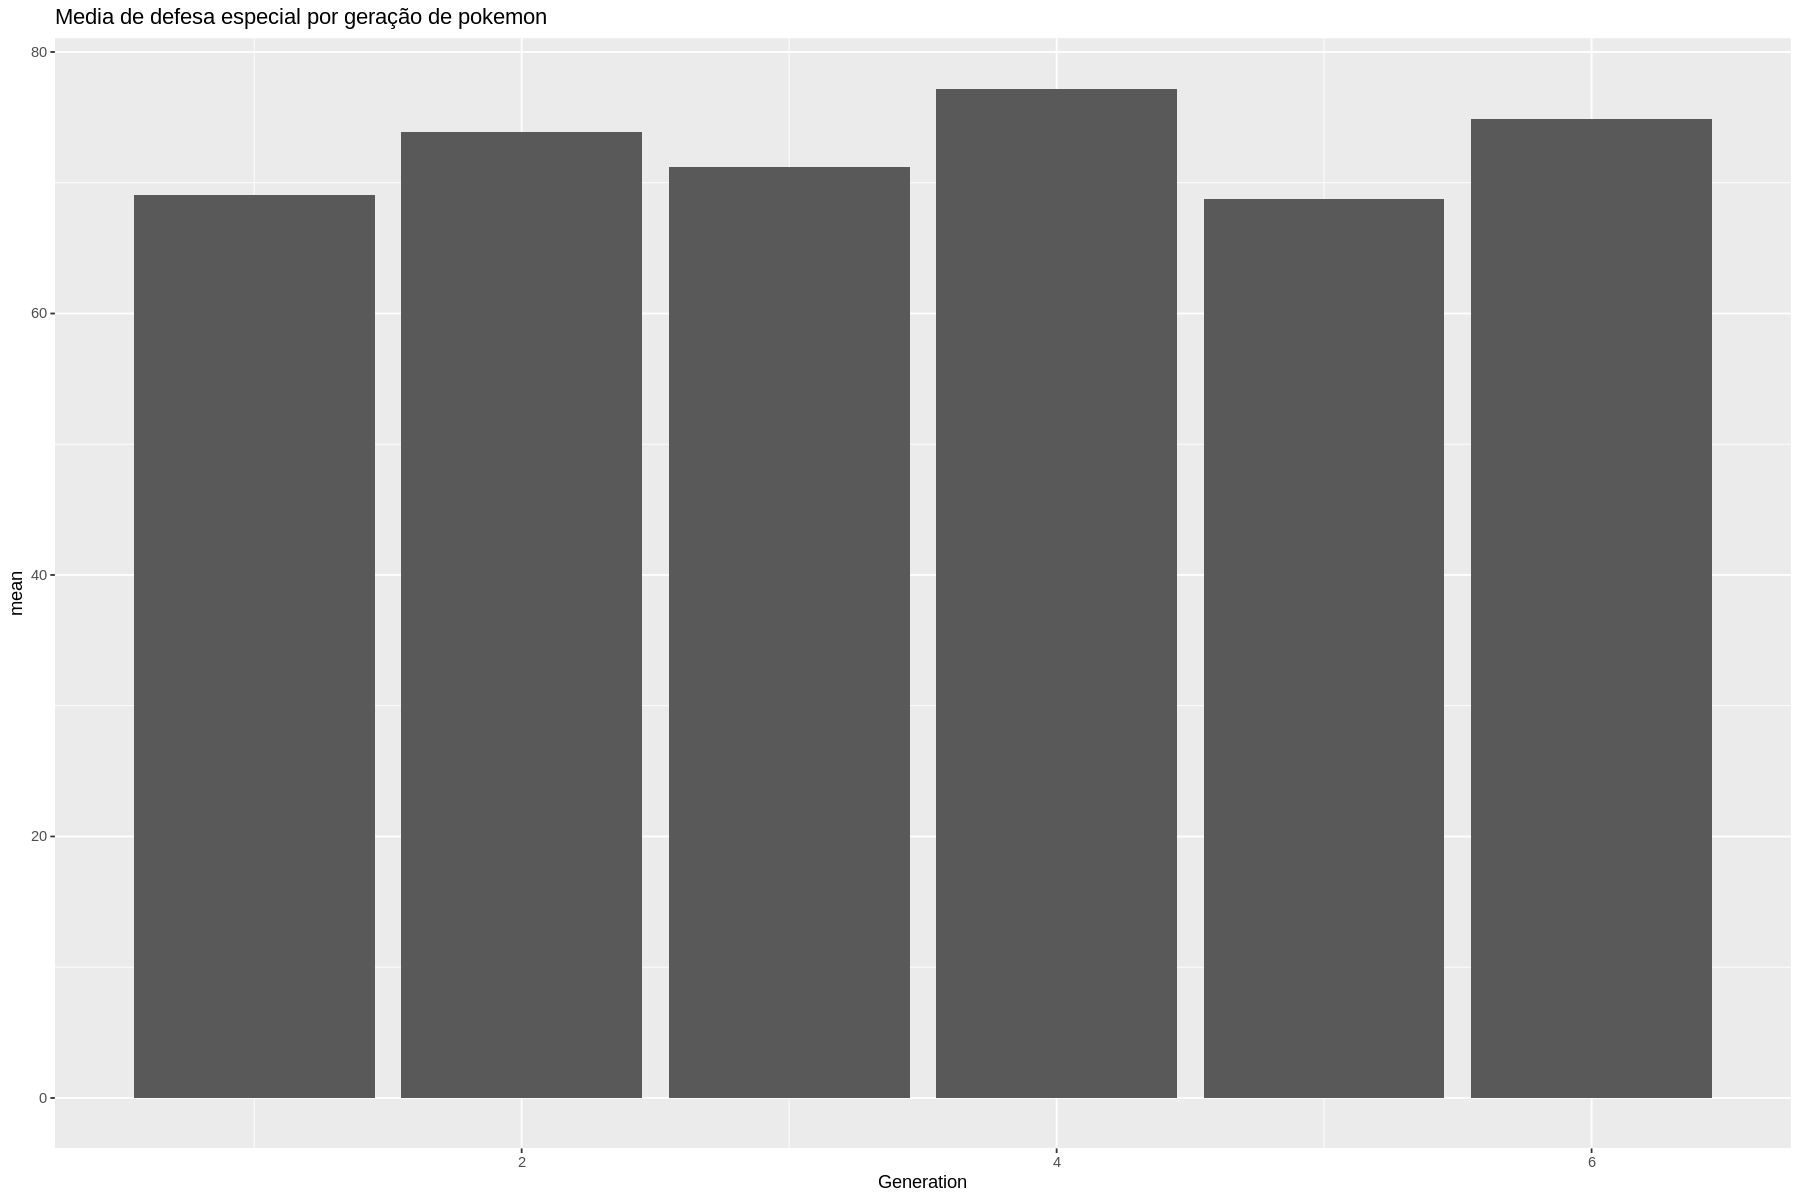

In [33]:
ggplot(data = mediaSpDefesa, aes(x = Generation, y = mean)) + geom_bar(stat = "identity") + ggtitle("Media de defesa especial por geração de pokemon")

In [34]:
media <- cbind(mediaSpAtaque, mediaSpDefesa[,2])

names(media) <- c("geracao", "mediaSpAtaq","mediaSpDef")

mediaAtqDef <- melt(media, id = c("geracao"))

names(mediaAtqDef) <- c("geracao","Sp_ataq_def", "valor")

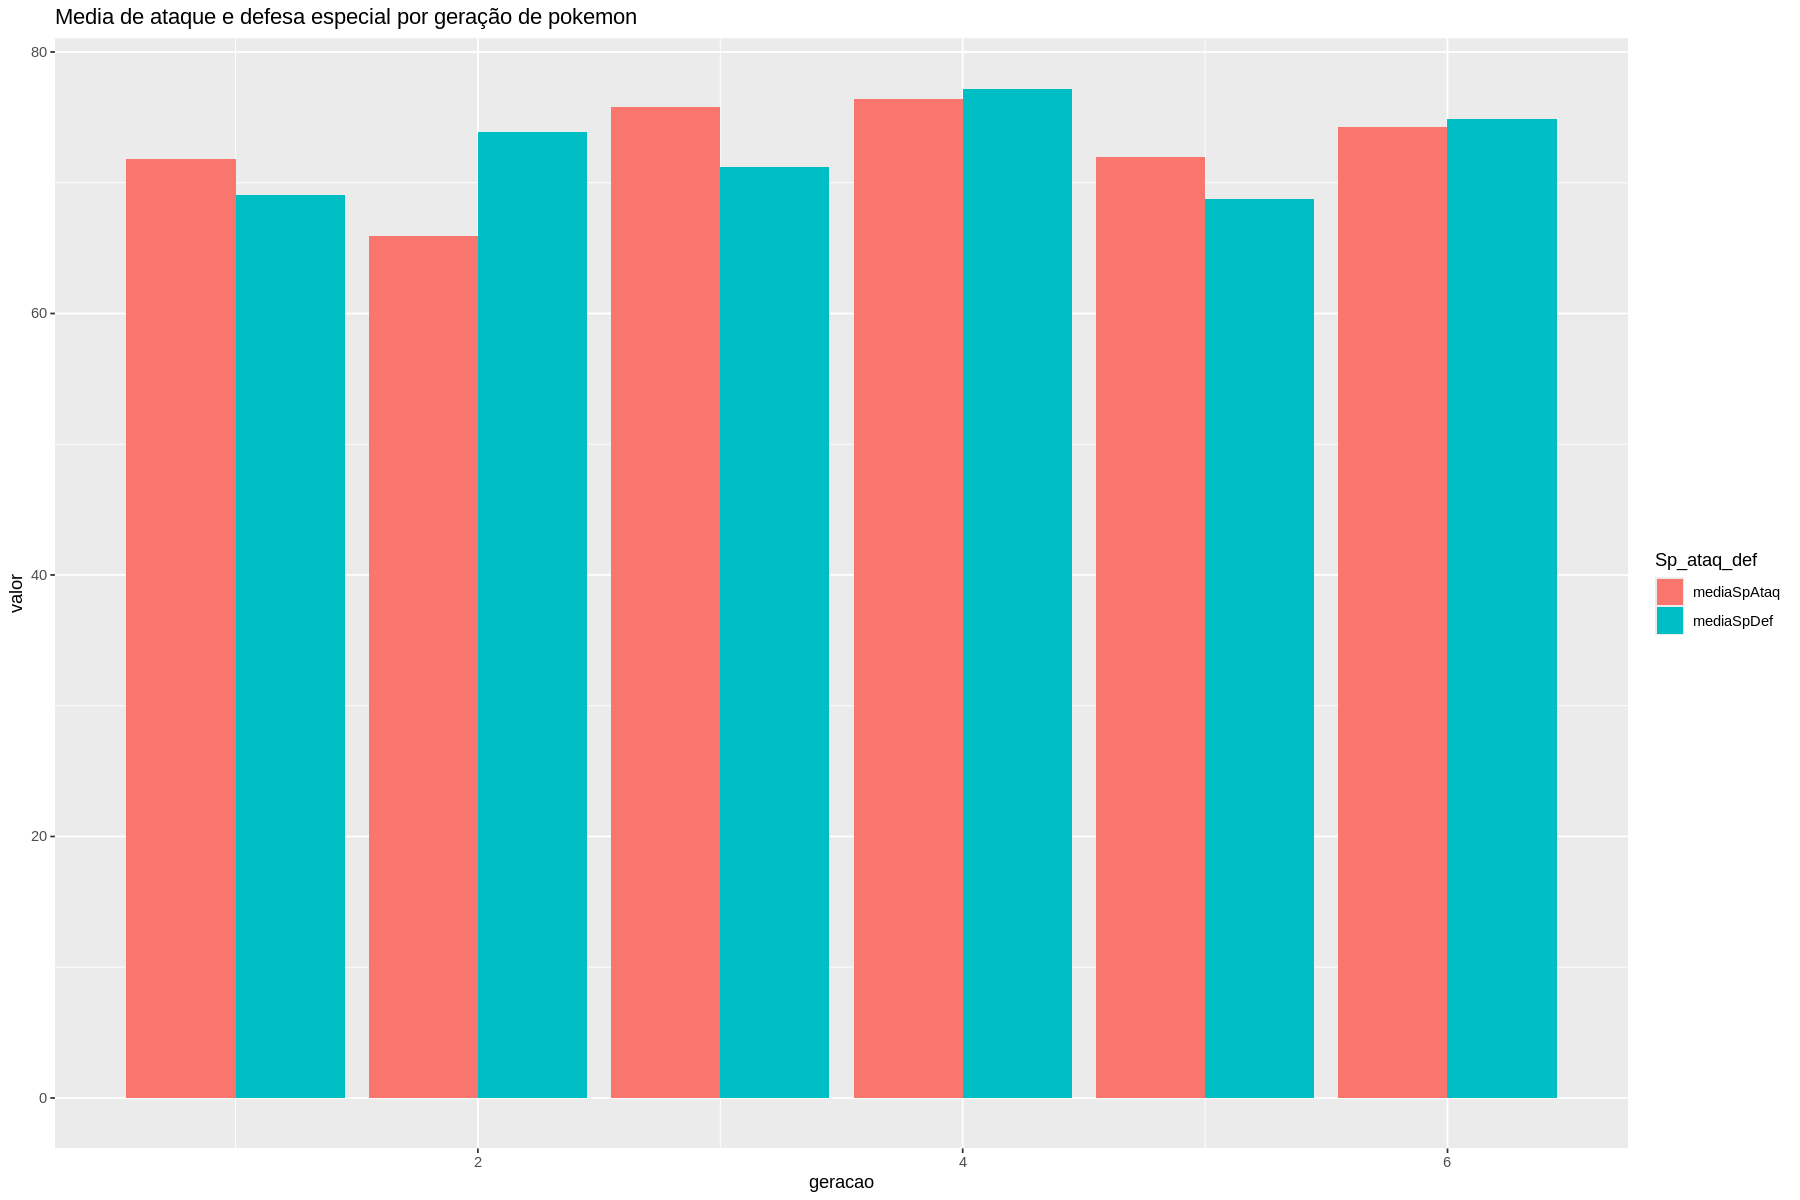

In [35]:
ggplot(data = mediaAtqDef, aes(x = geracao, y = valor,fill = Sp_ataq_def)) +
  geom_bar(stat = "identity",position=position_dodge()) +
  ggtitle("Media de ataque e defesa especial por geração de pokemon")